# Question 1

## Question 1.a

In [2]:
def nor(matrix):
    column_means = matrix.mean(axis=0)
    result_matrix = matrix - column_means
    return result_matrix

In [3]:
import numpy as np
import pandas as pd

def calculate_vector_variance (A):
    U,S,Vt = np.linalg.svd(A ,full_matrices= False)
    eigenvalues = (S ** 2) / (A.shape[0] - 1)
    total_variance = eigenvalues.sum()
    variacne_frac = eigenvalues / total_variance
    #eigenvalues = np.around(eigenvalues,decimals=3)
    #variacne_frac = np.around(variacne_frac,decimals=3)
    return eigenvalues, variacne_frac

In [4]:
import numpy as np
import pandas as pd

# Matrix A
#4: variables
#5: samples
A = np.array([
    [5,5,0,4],
    [1,1,5,0],
    [3,2,0,4],
    [5,3,0,5],
    [0,0,4,0]
])


In [5]:
# samples: 5
# variables: 4
Nor_A = nor(A)

#Nor_A
eigenvalues , variance_farc = calculate_vector_variance(Nor_A)
#Output
#np.set_printoptions(precision=4)
print("Eigenvalues: ")
print(eigenvalues)
print("\nVariance Fractions:")
print(variance_farc)
print(f"\nPercentage of total variance covered by the first eigenvalue: {variance_farc[0] * 100:.5f}%")

Eigenvalues: 
[1.92202892e+01 1.37960341e+00 2.95217138e-01 4.89024219e-03]

Variance Fractions:
[9.19631063e-01 6.60097325e-02 1.41252219e-02 2.33982880e-04]

Percentage of total variance covered by the first eigenvalue: 91.96311%


## Question 1.b

In [6]:
import numpy as np
import pandas as pd

In [7]:
def covariance_matrix(A):
    n_samples = A.shape[0]
    cov = np.dot(A.T,A) / (n_samples - 1 )
    return cov

In [8]:
def eigen_composition(A):
    eigenvalues , eigenvectors = np.linalg.eig(A)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:,sorted_indices]
    return eigenvalues, eigenvectors

In [9]:
def principal_components(A, n_components):
    Nor_A = nor(A)
    cov = covariance_matrix(Nor_A)
    eigenvalues , eigenvectors = eigen_composition(cov)
    principal_components = eigenvectors[:,:n_components]
    PCA_data = np.dot(Nor_A, principal_components)
    return PCA_data, eigenvalues, eigenvectors

In [10]:
bPC,beigenvalues,beigenvectors = principal_components(A,1)
print(bPC)
print(beigenvalues)
print(beigenvectors[:1])

[[ 3.94645844]
 [-4.53698958]
 [ 1.76612071]
 [ 3.70825924]
 [-4.88384882]]
[1.92202892e+01 1.37960341e+00 2.95217138e-01 4.89024219e-03]
[[ 0.50773119  0.32963362  0.56347395 -0.56218131]]


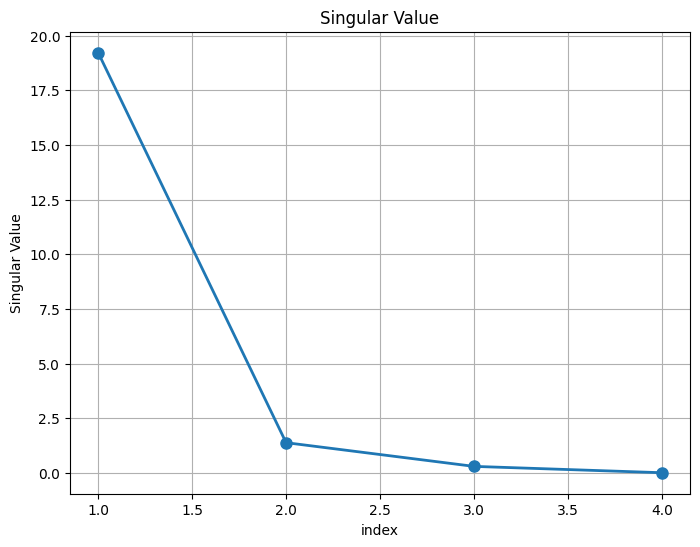

In [11]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', linewidth=2, markersize=8) # from 1 to length +1 we also can use
#plt.plot(range(0, len(eigenvalues) ), eigenvalues, 'o-', linewidth=2, markersize=8)
plt.title('Singular Value')
plt.xlabel('index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

# Question 2

In [36]:
import numpy as np
import pandas as pd
filename = "framingham_heart_disease.csv"
heart_data_initianl = pd.read_csv(filename)

heart_data = heart_data_initianl[['male','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','prevalentHyp']]
# Filling in with plurals
heart_data_mode = heart_data.apply(lambda x: x.fillna(x.mode()[0]),axis=0)
heart_data_mode

,male,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,prevalentHyp
0,1,0.0,195.0,106.0,70.0,26.97,80.0,0
1,0,0.0,250.0,121.0,81.0,28.73,95.0,0
2,1,20.0,245.0,127.5,80.0,25.34,75.0,0
3,0,30.0,225.0,150.0,95.0,28.58,65.0,1
4,0,23.0,285.0,130.0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...
4233,1,1.0,313.0,179.0,92.0,25.97,66.0,1
4234,1,43.0,207.0,126.5,80.0,19.71,65.0,0
4235,0,20.0,248.0,131.0,72.0,22.00,84.0,0
4236,0,15.0,210.0,126.5,87.0,19.16,86.0,0


In [41]:
X = heart_data_mode.drop(columns=['prevalentHyp'])
y = heart_data_mode['prevalentHyp']
print(X)
print(y)

      male  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate
0        1         0.0    195.0  106.0   70.0  26.97       80.0
1        0         0.0    250.0  121.0   81.0  28.73       95.0
2        1        20.0    245.0  127.5   80.0  25.34       75.0
3        0        30.0    225.0  150.0   95.0  28.58       65.0
4        0        23.0    285.0  130.0   84.0  23.10       85.0
...    ...         ...      ...    ...    ...    ...        ...
4233     1         1.0    313.0  179.0   92.0  25.97       66.0
4234     1        43.0    207.0  126.5   80.0  19.71       65.0
4235     0        20.0    248.0  131.0   72.0  22.00       84.0
4236     0        15.0    210.0  126.5   87.0  19.16       86.0
4237     0         0.0    269.0  133.5   83.0  21.47       80.0

[4238 rows x 7 columns]
0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: prevalentHyp, Length: 4238, dtype: int64


In [44]:
X_matrix = X.to_numpy
y_matrix = y.to_numpy
Nor_X = nor(X)
X_PC3,X_eigenvalues,X_eigenvectors = principal_components(Nor_X,3)

In [46]:
X_eigenvalues[:3]

array([2001.49123735,  555.70508269,  152.80438445])

In [55]:
_ , X_variance_farc = calculate_vector_variance(Nor_X)
X_variance_farc[:3]

array([0.69120527, 0.19191005, 0.05277025])

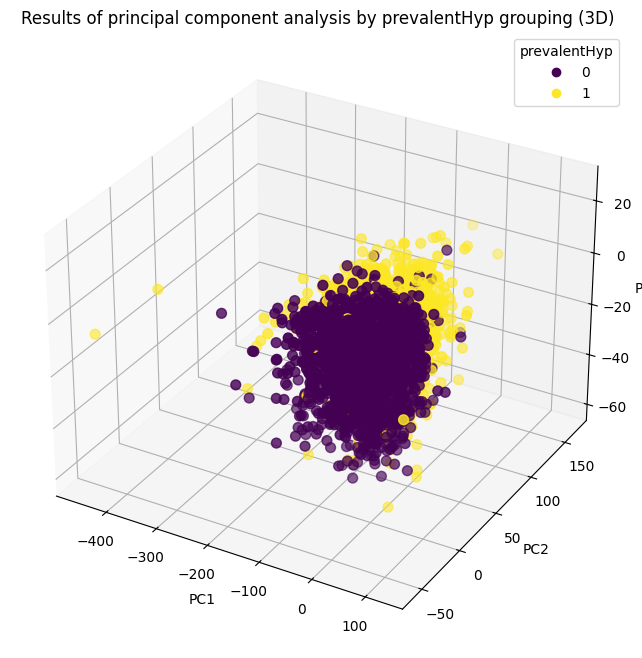

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_PC3[:, 0], X_PC3[:, 1], X_PC3[:, 2], c=y, cmap='viridis', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Results of principal component analysis by prevalentHyp grouping (3D)')
plt.legend(*scatter.legend_elements(), title='prevalentHyp')
plt.show()

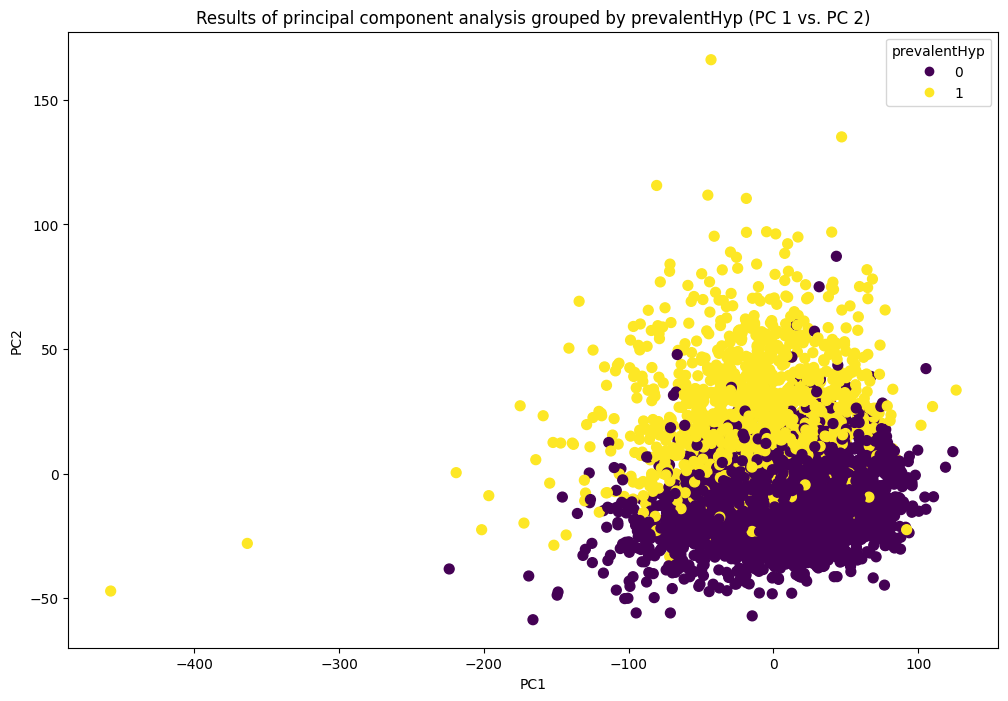

In [59]:
plt.figure(figsize=(12, 8))
plt.scatter(X_PC3[:, 0], X_PC3[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Results of principal component analysis grouped by prevalentHyp (PC 1 vs. PC 2)')
plt.legend(*scatter.legend_elements(), title='prevalentHyp')
plt.show()

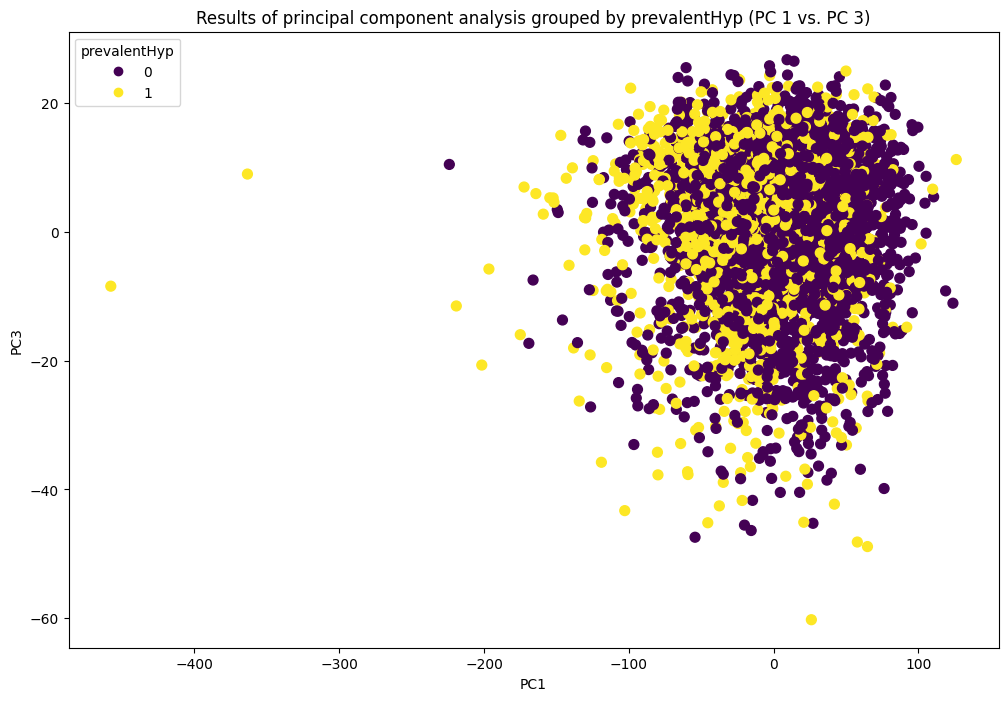

In [60]:
plt.figure(figsize=(12, 8))
plt.scatter(X_PC3[:, 0], X_PC3[:, 2], c=y, cmap='viridis', s=50)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('Results of principal component analysis grouped by prevalentHyp (PC 1 vs. PC 3)')
plt.legend(*scatter.legend_elements(), title='prevalentHyp')
plt.show()